# Use different engines

This notebook demonstrates how to execute a workflow with different engines.

In [1]:
import os
import shutil

from ewoks import execute_graph
from ewokscore.variable import value_from_transfer
from ewokscore.tests.utils.show import show_graph
from ewokscore.tests.examples.graphs import get_graph

## Select and configure a task scheduler

In [2]:
scheduler = None  # select any of the schedulers shown below

execute_options = dict()

if scheduler == "dask_multithreading":
    # tasks are distributed by a local scheduler over multiple threads
    execute_options["engine"] = "dask"
    execute_options["scheduler"] = "multithreading"
elif scheduler == "dask_multiprocessing":
    # tasks are distributed by a local scheduler over multiple processes
    execute_options["engine"] = "dask"
    execute_options["scheduler"] = "multiprocessing"
elif scheduler == "dask_local_cluster":
    # tasks are distributed by a local scheduler
    execute_options["engine"] = "dask"
    execute_options["scheduler"] = "cluster"
elif scheduler == "dask_remote_cluster":
    # tasks are distributed by a remote scheduler
    execute_options["engine"] = "dask"
    execute_options["scheduler"] = "127.0.0.1:40331"

    # There are different ways to start a remote scheduler
    #
    # Start a dask scheduler on any host:
    #  >>> from ewoksdask.schedulers import local_scheduler
    #  >>> scheduler = local_scheduler(n_workers=5)
    #
    # Start a dask scheduler on a host that can launch slurm jobs:
    #  >>> from ewoksdask.schedulers import slurm_scheduler
    #  >>> scheduler = slurm_scheduler(maximum_jobs=5)

elif scheduler == "pypushflow":
    # tasks are distributed by a local scheduler over multiple processes
    execute_options["engine"] = "ppf"
else:
    # tasks are executed in a single thread
    scheduler = None
    pass

## Select a task graph

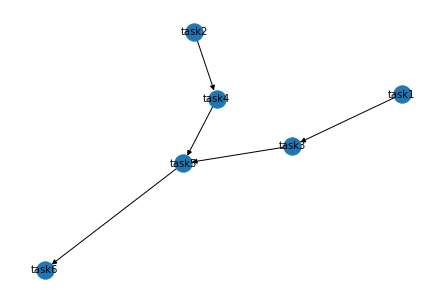

In [7]:
taskgraph, expected_results = get_graph("acyclic1")
show_graph(taskgraph, stdout=False, plot=True)

## Configure storage of results (if any)

In [4]:
def prepare_storage(clean=True):
    if not varinfo["root_uri"]:
        return  # results are not persisted by ewoks
    if clean:
        shutil.rmtree(varinfo["root_uri"], ignore_errors=True)
    os.makedirs(varinfo["root_uri"], exist_ok=True)


varinfo = {"root_uri": None}  # folder where all results will be saved
execute_options["varinfo"] = varinfo
prepare_storage(clean=True)

## Execute the workflow

In [5]:
print("Execution options:")
print(execute_options)
results = execute_graph(taskgraph, **execute_options)

Execution options:
{'varinfo': {'root_uri': None}}


## Inspect results

In [6]:
for name, result in results.items():
    value = value_from_transfer(result, varinfo=varinfo)
    print(f" {name} =", value)

 result = 16
